In [68]:
# 引入必须的库
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy.stats import *
import pandas as pd
import seaborn as sns


In [69]:
# 设置matplotlib的格式

# 设置中文为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 设置英文为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']

plt.figure()    # 创建画布
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示

plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #保存图片分辨率
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200

plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style


version = "V1.1"

<Figure size 2400x1200 with 0 Axes>

In [70]:
# 定义fit函数
def fit(x_label='x', y_label='y'):

    # 从框中读取数据
    x = list(map(float, x_entry.get().split(',')))
    y = list(map(float, y_entry.get().split(',')))

    # 将x，y转化成numpy.array类型
    x = np.array(x)
    y = np.array(y)

    # 清空画布
    f.clf()

    # 绘制（x，y）散点子图
    a = f.add_subplot(111)
    a.scatter(x, y)

    # 从下拉菜单获取拟合类型
    fit_type = var.get()

    # 根据拟合类型进行拟合，类型有："线性回归拟合", "多项式回归拟合", "指数回归拟合", "对数回归拟合"
    if fit_type == "线性回归拟合":
            # 线性回归拟合
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            a.plot(x, p(x), 'r')
    elif fit_type == "多项式回归拟合":
            # 多项式回归拟合
            z = np.polyfit(x, y, 2)
            p = np.poly1d(z)
            a.plot(x, p(x), 'r')
    elif fit_type == "指数回归拟合":
            # 指数回归拟合
            z = np.polyfit(x, np.log(y), 1)
            p = np.poly1d(z)
            a.plot(x, np.exp(p(x)), 'r')
    elif fit_type == "对数回归拟合":
            # 对数回归拟合
            z = np.polyfit(np.log(x), y, 1)
            p = np.poly1d(z)
            a.plot(x, p(np.log(x)), 'r')
    else:
        print("未知拟合类型")

    # 绘制拟合图像的子图
    a.set_title(fit_type)
    
    # 设置标签
    a.set_xlabel(x_label)
    a.set_ylabel(y_label)

    # 画图
    canvas.draw()

    # 调用评价模块
    evaluate(x, y, p)
    
# 导入csv的函数
def import_csv():

    # 打开文件对话框
    file_path = filedialog.askopenfilename()

    # 读取 CSV 文件
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        data = list(reader)

    # 提取 x 和 y 值
    x_values = data[0][1:]  # 第一行作为 x 值
    y_values = data[1][1:]  # 第二行作为 y 值

    # 提取 x 和 y 轴标签
    x_label_text = data[0][0]  # 第一列作为 x 轴标签
    y_label_text = data[1][0]  # 第二列作为 y 轴标签

    # 更新输入框
    x_entry.delete(0, tk.END)
    x_entry.insert(0, ', '.join(x_values))
    y_entry.delete(0, tk.END)
    y_entry.insert(0, ', '.join(y_values))

    # 自动拟合画图
    fit(x_label=x_label_text, y_label=y_label_text)

def evaluate(x,y,p):
    
    # 线性回归拟合
    y_pred = p(x)
    
    # 计算残差
    residuals = y - y_pred
    
    # 计算平均值
    mean = np.mean(y)
    
    # 计算总平方和
    ss_total = np.sum((y - mean) ** 2)
    
    # 计算回归平方和
    ss_reg = np.sum((y_pred - mean) ** 2)
    
    # 计算残差平方和
    ss_res = np.sum(residuals ** 2)
    
    # 计算决定系数
    r2 = 1 - ss_res / ss_total
    
    # 计算调整决定系数
    adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - 1 - 1)
    
    # 计算均方误差
    mse = np.mean(residuals ** 2)
    
    # 计算均方根误差
    rmse = np.sqrt(mse)
    
    # 计算平均绝对误差
    mae = np.mean(np.abs(residuals))
    
    # 计算平均绝对百分比误差
    mape = np.mean(np.abs(residuals / y))
    
    # 计算残差标准差
    std_res = np.std(residuals)
    
    # 计算残差标准误
    se_res = np.sqrt(ss_res / (len(y) - 2))
    
    # 计算回归系数
    beta = p[1]
    
    # 计算截距
    alpha = p[0]
    
    # 计算回归标准误
    se_reg = np.sqrt(ss_res / (len(y) - 2) / np.sum((x - np.mean(x)) ** 2))
    
    # 计算回归置信区间
    ci_reg = se_reg * 1.96
    
    # 计算回归置信区间下限
    ci_reg_lower = beta - ci_reg
    
    # 计算回归置信区间上限
    ci_reg_upper = beta + ci_reg
    
    # 计算截距标准误
    se_int = np.sqrt(ss_res / (len(y) - 2) * (1 / len(y) + np.mean(x) ** 2 / np.sum((x - np.mean(x)) ** 2)))
    
    # 计算截距置信区间
    ci_int = se_int * 1.96
    
    # 计算截距置信区间下限
    ci_int_lower = alpha - ci_int
    
    # 计算截距置信区间上限
    ci_int_upper = alpha + ci_int

    # 计算F统计量
    from scipy.stats import f, t
    
    # 计算F统计量的p值
    f_value = f.ppf(0.95, 1, len(y) - 2)
    p_f = 1 - f.cdf(f_value, 1, len(y) - 2)
    
    # 计算t统计量
    t_value = beta / se_reg
    
    # 计算t统计量的p值
    p_t = 1 - t.cdf(t_value, len(y) - 2)
    
    
    # 调用之前定义的函数，计算颜色
    color = evaluate_color(r2, mape, beta, mae)
    
    # 将颜色转换为十六进制格式
    color_hex = '#%02x%02x%02x' % color

    # 生成评价结果标签
    if color == (0, 255, 0):
        text_temp ='评价:拟合良好\n'
    elif color == (255, 255, 0):
        text_temp ='评价:拟合一般\n'
    elif color == (255, 0, 0):
        text_temp ='评价:拟合较差\n'
    else:
        text_temp =''

    # 根据计算参数的值，生成拟合评价
    text = f"{text_temp}"+f"拟合函数系数:{p}\n决定系数: {r2:.4f}\n调整决定系数: {adj_r2:.4f}\n均方误差: {mse:.4f}\n均方根误差: {rmse:.4f}\n平均绝对误差: {mae:.4f}\n平均绝对百分比误差: {mape:.4f}\n残差标准差: {std_res:.4f}\n残差标准误: {se_res:.4f}\n回归系数: {beta:.4f}\n截距: {alpha:.4f}\n回归标准误: {se_reg:.4f}\n回归置信区间: ({ci_reg_lower:.4f}, {ci_reg_upper:.4f})\n截距标准误: {se_int:.4f}\n截距置信区间: ({ci_int_lower:.4f}, {ci_int_upper:.4f})\nF统计量: {f_value:.4f}\nF统计量的p值: {p_f:.4f}\nt统计量: {t_value:.4f}\nt统计量的p值: {p_t:.4f}"
    
    # 设置结果标签的颜色
    result_label.config(text=text, justify='left', bg=color_hex)


def evaluate_color(r2, mape, beta, mae):
    # 定义"表现非常好"，"表现还可以"和"表现都很差"的阈值
    good_thresholds = [0.7, 0.1, 0.7, 0.1]
    ok_thresholds = [0.4, 0.3, 0.5, 0.3]
    parameters = [r2, mape, beta, mae]

    performances = []
    # 判断每个参数的表现
    for i, (parameter, good, ok) in enumerate(zip(parameters, good_thresholds, ok_thresholds)):
        if str(parameter) in ['inf', '-inf']:
            pass
        else:
            if i in [1, 3]:  # 对于mape和mae，值越小表示表现越好
                performances.append('good' if parameter <= good else 'ok' if parameter <= ok else 'bad')
            else:
                performances.append('good' if parameter >= good else 'ok' if parameter >= ok else 'bad')

    if all(performance == 'good' for performance in performances):
        return (0, 255, 0)  # 绿色
    elif all(performance == 'bad' for performance in performances):
        return (255, 0, 0)  # 红色
    else:
        return (255, 255, 0)  # 黄色
    
def save_image():
    # 打开文件对话框
    file_path = filedialog.asksaveasfilename(defaultextension='.png', filetypes=[('PNG files', '*.png')])

    # 保存图片
    plt.savefig(file_path)

    

KeyboardInterrupt: 

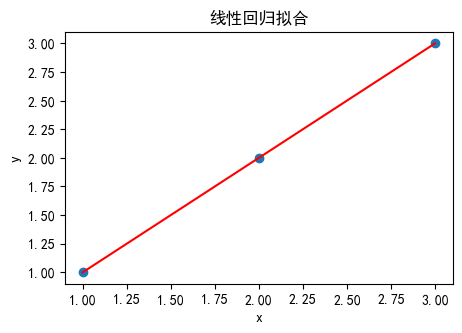

In [71]:
# 创建主窗口
root = tk.Tk()

# 设置窗口标题
root.title("拟合工具"+version)

# 最大化窗口
root.state('zoomed')

# 设计一个下拉菜单，默认选择“线性回归拟合”
var = tk.StringVar()
var.set("线性回归拟合")
option = tk.OptionMenu(root, var, "线性回归拟合", "多项式回归拟合", "指数回归拟合", "对数回归拟合")
option.pack()

frame = tk.Frame()
frame.pack()

# 创建回归直线拟合的输入组件
x_label = tk.Label(frame, text="输入x值 (用逗号分隔):")
x_label.grid(row=0, column=0)
x_entry = tk.Entry(frame)
x_entry.grid(row=0, column=1)

y_label = tk.Label(frame, text="输入y值 (用逗号分隔):")
y_label.grid(row=1, column=0)
y_entry = tk.Entry(frame)
y_entry.grid(row=1, column=1)

# 创建拟合评价文字（预留较大空间）包括参数：决定系数、均方误差、回归标准误差、回归置信区间、F统计量、F统计量的p值、t统计量、t统计量的p值
result_label = tk.Label(frame, text="拟合评价")
result_label.grid(row=3, column=1)  # 使用grid布局管理器，将result_label放在画布的右侧

# 设计一个按钮，用于导入csv文件
button1 = tk.Button(frame, text="导入csv文件", command=import_csv)
# 按钮跨越两行，位于输入框的右侧
button1.grid(row=0, column=2, rowspan=2) 

# 设计一个按钮，用于保存图像
button2 = tk.Button(root, text="保存图像", command=save_image)
button2.pack()

# 设计一个按钮，用于触发拟合操作
button = tk.Button(root, text="拟合", command=fit)
button.pack()

# 设计一个画布，用于显示拟合图像
f = plt.figure(figsize=(5, 4), dpi=100)
canvas = FigureCanvasTkAgg(f, master=root)
canvas.draw()
canvas.get_tk_widget().pack()

# 进入消息循环
root.mainloop()

